In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from tqdm import tqdm  # Optional: for progress tracking
from src.utils.Contact_Matrix import create_contact_matrix
from src.utils.visualization.core import create_standalone_colorbar, Lx, Ly, discretize_cmaps

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
from bootstrap_CM_module import *

: 

In [3]:
df = pd.read_csv("data_homophily.csv")
df = df.dropna()

mask_distribution = extract_behavior_distribution(df, "masks")
test_distribution = extract_behavior_distribution(df, "testing")
vaccine_distribution = extract_behavior_distribution(df, "vacc")

mask_matrix = generate_contact_matrix(df, "masks")
test_matrix = generate_contact_matrix(df, "testing")
vaccine_matrix = generate_contact_matrix(df, "vacc")

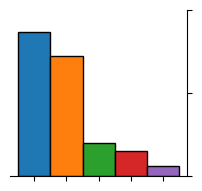

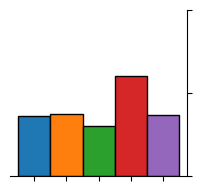

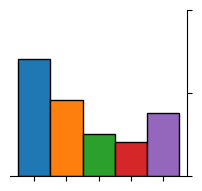

In [4]:
fig, ax = plot_histogram_distribution(mask_distribution, save_path="figures/Fig_2/masks_distribution.pdf")
fig, ax = plot_histogram_distribution(test_distribution, save_path="figures/Fig_2/testing_distribution.pdf")
fig, ax = plot_histogram_distribution(vaccine_distribution, save_path="figures/Fig_2/vaccine_distribution.pdf")

In [18]:
0.5/0.1 + 0.5/(0.1 + 0.19799999999999998)

6.677852348993289

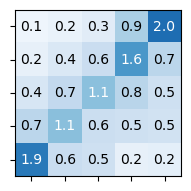

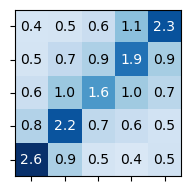

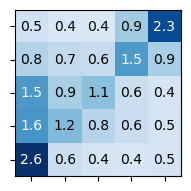

In [5]:
fig, ax = plot_contact_matrix(mask_matrix, Lx, Ly, path="figures/Fig_2/mask_contact_matrix.pdf")
fig, ax = plot_contact_matrix(test_matrix, Lx, Ly, path="figures/Fig_2/testing_contact_matrix.pdf")
fig, ax = plot_contact_matrix(vaccine_matrix, Lx, Ly, path="figures/Fig_2/vaccine_contact_matrix.pdf")

# bootstrap matherial

In [5]:
res_masks = bootstrap_pol_mean(df, "masks", n_bootstrap=1000)
res_testing = bootstrap_pol_mean(df, "testing", n_bootstrap=1000)
res_vacc = bootstrap_pol_mean(df, "vacc", n_bootstrap=1000)

Bootstrapping vacc: 100%|██████████| 1000/1000 [00:01<00:00, 527.47it/s]


In [6]:
print(f"[{np.round(res_masks['mean_ci'][0], 2)}, {np.round(res_masks['mean_estimate'], 2)}, {np.round(res_masks['mean_ci'][1], 2)}]")
print(f"[{np.round(res_masks['polarization_ci'][0], 2)}, {np.round(res_masks['polarization_estimate'], 2)}, {np.round(res_masks['polarization_ci'][1], 2)}]")

print(f"[{np.round(res_testing['mean_ci'][0], 2)}, {np.round(res_testing['mean_estimate'], 2)}, {np.round(res_testing['mean_ci'][1], 2)}]")
print(f"[{np.round(res_testing['polarization_ci'][0], 2)}, {np.round(res_testing['polarization_estimate'], 2)}, {np.round(res_testing['polarization_ci'][1], 2)}]")

print(f"[{np.round(res_vacc['mean_ci'][0], 2)}, {np.round(res_vacc['mean_estimate'], 2)}, {np.round(res_vacc['mean_ci'][1], 2)}]")
print(f"[{np.round(res_vacc['polarization_ci'][0], 2)}, {np.round(res_vacc['polarization_estimate'], 2)}, {np.round(res_vacc['polarization_ci'][1], 2)}]")


[0.76, 0.77, 0.79]
[0.25, 0.28, 0.3]
[0.45, 0.47, 0.49]
[0.46, 0.48, 0.5]
[0.59, 0.61, 0.63]
[0.55, 0.57, 0.6]


# Matherial for the bootstrap of the homophily

In [8]:
boot_hom_masks = bootstrap_homophily(df, "masks", n_bootstrap=10000)
boot_hom_tests = bootstrap_homophily(df, "testing", n_bootstrap=10000)
boot_hom_vaccs = bootstrap_homophily(df, "vacc", n_bootstrap=10000)

Bootstrapping vacc: 100%|██████████| 10000/10000 [09:09<00:00, 18.21it/s] 


In [9]:
print(f"[{np.round(boot_hom_masks['homophily_ci'][0], 2)}, {np.round(boot_hom_masks['homophily_estimate'], 2)}, {np.round(boot_hom_masks['homophily_ci'][1], 2)}]")
print(f"[{np.round(boot_hom_tests['homophily_ci'][0], 2)}, {np.round(boot_hom_tests['homophily_estimate'], 2)}, {np.round(boot_hom_tests['homophily_ci'][1], 2)}]")
print(f"[{np.round(boot_hom_vaccs['homophily_ci'][0], 2)}, {np.round(boot_hom_vaccs['homophily_estimate'], 2)}, {np.round(boot_hom_vaccs['homophily_ci'][1], 2)}]")

[2.5, 2.83, 3.18]
[2.01, 2.32, 2.64]
[1.6, 2.05, 2.4]


In [10]:
def plot_bootstrap_heatmap(x_data, y_data, x_label="X", y_label="Y", bins=20):
    """
    Super simple function to create a heatmap of two bootstrap result lists.
    
    Args:
        x_data: First list (e.g., bootstrap_means)
        y_data: Second list (e.g., bootstrap_homophily)
        x_label: Label for x-axis
        y_label: Label for y-axis
        bins: Number of bins for the 2D histogram
    
    Returns:
        fig, ax: matplotlib figure and axis objects
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create 2D histogram (heatmap)
    h = ax.hist2d(x_data, y_data, bins=bins, cmap='Blues')
    
    # Add colorbar
    plt.colorbar(h[3], ax=ax, label='Count')
    
    # Labels
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f'{y_label} vs {x_label}')
    
    return fig, ax

In [11]:
import matplotlib.pyplot as plt
import numpy as np


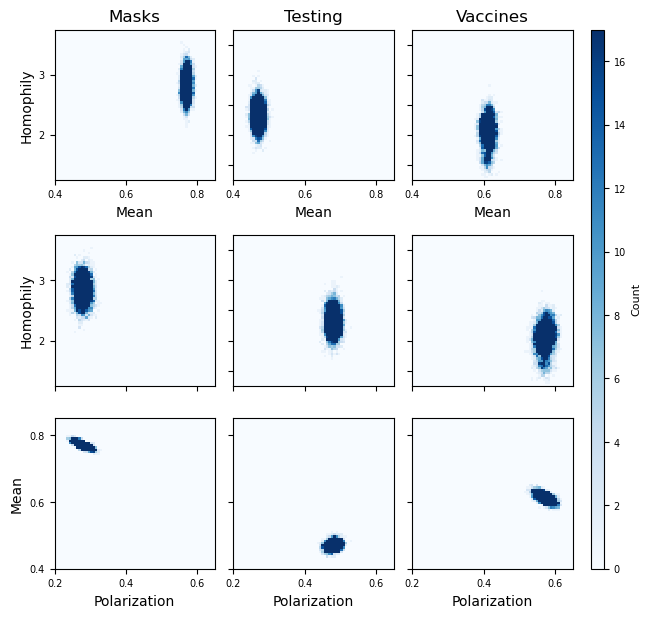

In [15]:
results_dict = {
    'masks': boot_hom_masks,
    'testing': boot_hom_tests, 
    'vacc': boot_hom_vaccs
}

fig, axes = plot_3x3_bootstrap_heatmaps(results_dict, bins = 150, figsize=(7.09, 7))
axes[(0,0)].set_title("Masks", fontsize=12)
axes[(0,1)].set_title("Testing", fontsize=12)
axes[(0,2)].set_title("Vaccines", fontsize=12)
for i in range(3):
    axes[(0,i)].set_xlabel("Mean", fontsize=10)
for i in range(2):
    axes[(i,0)].set_ylabel("Homophily", fontsize=10)
axes[(2,0)].set_ylabel("Mean", fontsize=10)
for i in range(3):
    axes[(2,i)].set_xlabel("Polarization", fontsize=10)


for i in range(3):
    axes[(0,i)].set_xlim(0.4, 0.85)
    axes[(1,i)].set_xlim(0.2, 0.65)
    axes[(2,i)].set_xlim(0.2, 0.65)

    axes[(0,i)].set_xticks([0.4, 0.6, 0.8])
    axes[(1,i)].set_xticks([0.2, 0.4,  0.6])
    axes[(2,i)].set_xticks([0.2, 0.4,  0.6])

for i in range(3):
    axes[(0,i)].set_ylim(1.25,3.75)
    axes[(1,i)].set_ylim(1.25,3.75)
    axes[(2,i)].set_ylim(0.4,0.85)
    axes[(2,i)].set_yticks([0.4, 0.6, 0.8])


fig.savefig("Figures/SI/Fig_SI_bootstrapping.pdf", bbox_inches='tight')